In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import subprocess
import os

In [2]:
def draw(latex):
    from PIL import Image

    tmpfilename = "circuit"
    latex_filename =  f"{tmpfilename}.tex"
    pdf_filename = f"{tmpfilename}.pdf"
    with open(latex_filename, "w") as latex_file:
        latex_file.write(latex)
    try:
        cmd = f"pdflatex {latex_filename}"
#        print(f"Running cmd {cmd}")
        res = subprocess.run(cmd, capture_output=True)
#        print(str(res.stdout))
    except OSError as exc:
        print("`pdflatex` command could not be run.")
        return None
    except subprocess.CalledProcessError as exc:
        print(
            "Unable to compile LaTeX. Perhaps you are missing the `qcircuit` package."
            " The output from the `pdflatex` command is in `latex_error.log`."
        )
        print(exc.stdout)
        return None
    try:
        subprocess.run(
            ["pdftocairo", "-singlefile", "-png", "-q", pdf_filename, tmpfilename],
            check=True,
        )
    except (OSError, subprocess.CalledProcessError) as exc:
        print("`pdftocairo` failed to produce an image.")
        print(res.stdout.decode("utf-8"))
        return None
    os.remove(pdf_filename)
    image = Image.open(tmpfilename + ".png")
#        image = utils._trim(image)
    return image

# Bell pair generation

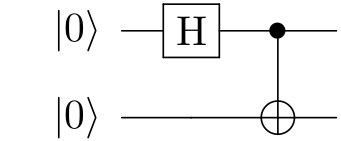

In [3]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \nghost{1} & \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

# Swap

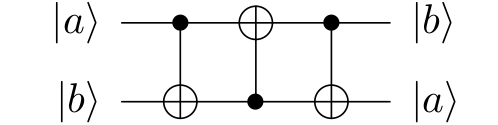

In [4]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{a}} & \ctrl{1} & \targ& \ctrl{1} & \rstick{\ket{b}} \qw & \nghost{1}\\
    \nghost{1} & \lstick{\ket{b}} & \targ & \ctrl{-1}& \targ & \rstick{\ket{a}} \qw
}
}


\end{document}"""

draw(latex)

# Deutsch-Jozse

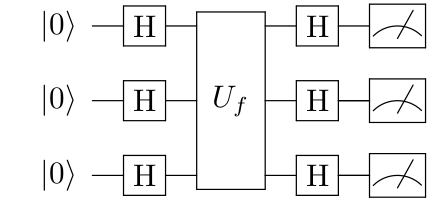

In [5]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.5}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \multigate{2}{U_f} & \gate{\mathrm{H}} & \meter \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{U_f}        & \gate{\mathrm{H}} & \meter \qw \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{U_f}        & \gate{\mathrm{H}} & \meter \qw
}
}


\end{document}"""

draw(latex)

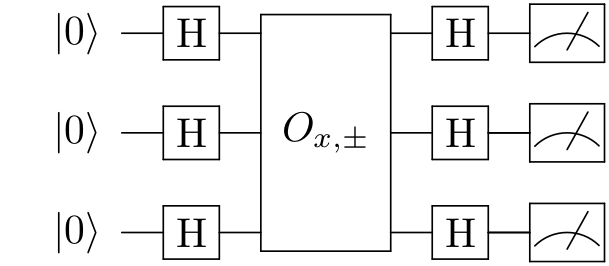

In [6]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \multigate{2}{O_{x, \pm}} & \gate{\mathrm{H}} & \meter \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{O_{x, \pm}}        & \gate{\mathrm{H}} & \meter \qw \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{O_{x, \pm}}        & \gate{\mathrm{H}} & \meter \qw
}
}


\end{document}"""

draw(latex)

# Grover

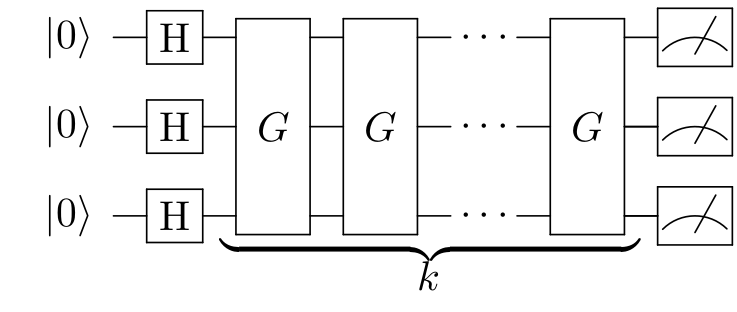

In [7]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \multigate{2}{G} & \multigate{2}{G} & \qw & \cdots  & & \multigate{2}{G}  & \meter \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{G}        & \ghost{G}        & \qw & \cdots  & & \ghost{G}         & \meter \qw \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{G}        & \ghost{G}        & \qw & \cdots  & & \ghost{G}         & \meter \qw \gategroup{1}{4}{3}{9}{.7em}{_\}} \\
    & & & & \ \ \ \ \ \ \ k& & & & \\
    & & & & & & & & \\
}
}


\end{document}"""
draw(latex)

# Fourier

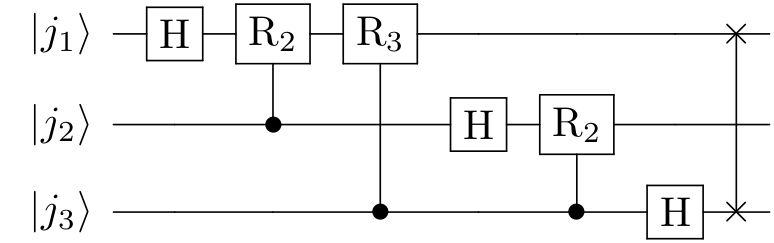

In [8]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{j_1}} & \gate{\mathrm{H}} & \gate{\mathrm{R_2}} & \gate{\mathrm{R_3}} & \qw               & \qw                 & \qw               & \qswap          & \qw \\
    \nghost{1} & \lstick{\ket{j_2}} & \qw               & \ctrl{-1}           & \qw                 & \gate{\mathrm{H}} & \gate{\mathrm{R_2}} & \qw               & \qw             & \qw \\
    \nghost{1} & \lstick{\ket{j_3}} & \qw               & \qw                 & \ctrl{-2}           & \qw               & \ctrl{-1}           & \gate{\mathrm{H}} & \qswap \qwx[-2] & \qw \\
}
}

\end{document}"""
draw(latex)

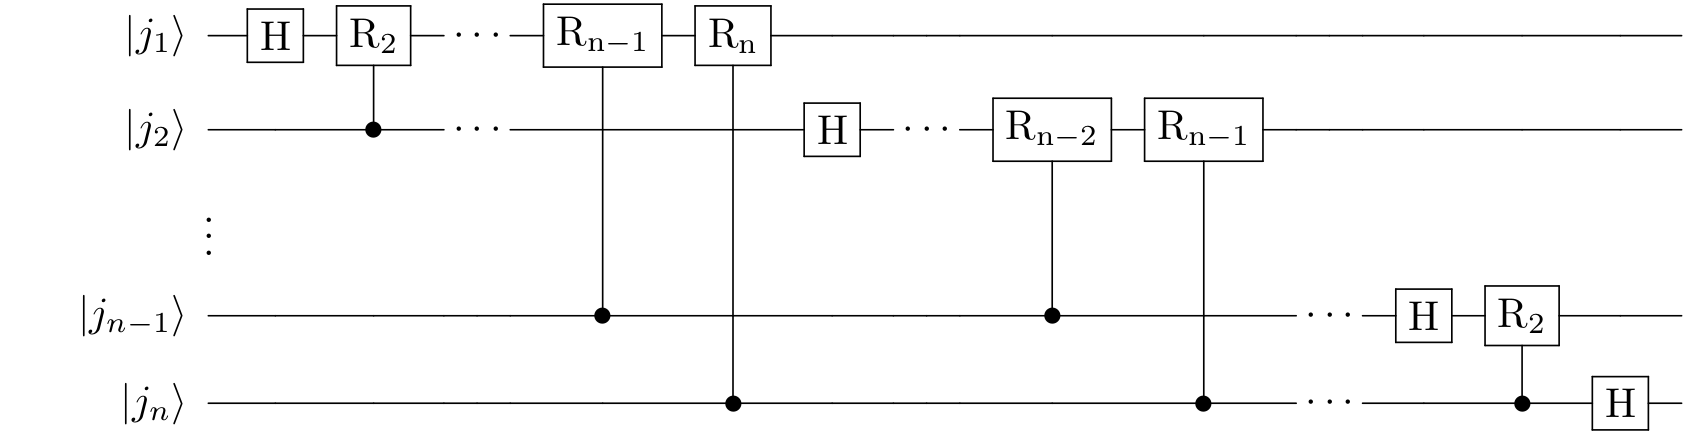

In [9]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{j_1}} & \gate{\mathrm{H}} & \gate{\mathrm{R_2}} & \qw & \cdots  & & \gate{\mathrm{R_{n-1}}}   & \gate{\mathrm{R_n}}  & \qw   & \qw  & \qw & \qw   & \qw  & \qw &\qw&\qw&\qw&\qw&\qw&\qw&\qw\\
    \nghost{1} & \lstick{\ket{j_2}} & \qw & \ctrl{-1}  & \qw & \cdots  & & \qw & \qw & \gate{\mathrm{H}} & \qw & \cdots & & \gate{\mathrm{R_{n-2}}}   & \gate{\mathrm{R_{n-1}}}  & \qw   & \qw &\qw&\qw&\qw&\qw&\qw \\
    & \push{\vdots}            & \\
    \nghost{\ket{j_{n-1}}} & \lstick{\ket{j_{n-1}}} & \qw & \qw& \qw& \qw& \qw&\ctrl{-3} & \qw & \qw& \qw& \qw& \qw&\ctrl{-2} & \qw & \qw & \cdots && \gate{\mathrm{H}} & \gate{\mathrm{R_2}} & \qw&\qw \\
    \nghost{\ket{j_n}} & \lstick{\ket{j_n}} &\qw&\qw&\qw&\qw&\qw&\qw&\ctrl{-4}&\qw&\qw&\qw&\qw&\qw&\ctrl{-3}&\qw&\cdots&&\qw&\ctrl{-1}&\gate{\mathrm{H}}&\qw
}
}

\end{document}"""
draw(latex)

# Phase estimation

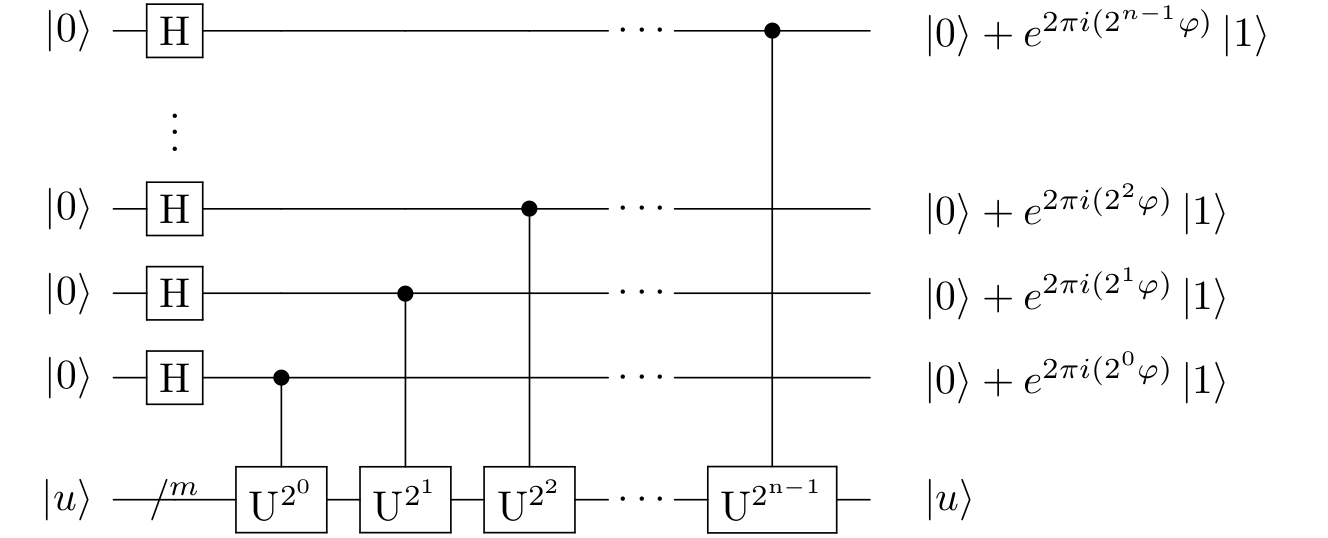

In [10]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \qw                     & \qw                     & \qw                     & \cdots & & \ctrl{6}                     & \qw & \rstick{\ket{0} + e^{2\pi i(2^{n-1}\varphi)}\ket{1}} & \nghost{\ket{0} + e^{2\pi i(2^{n-1}\varphi)}\ket{1}}\\
               &                  & \push{\vdots}            &                         &                         &                         &                         &        & &                              &     &                  & \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \qw                     & \ctrl{4}                & \qw                     & \cdots & & \qw                          & \qw & \rstick{\ket{0} + e^{2\pi i(2^2\varphi)}\ket{1}} & \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \ctrl{3}                & \qw                     & \qw                     & \cdots & & \qw                          & \qw & \rstick{\ket{0} + e^{2\pi i(2^1\varphi)}\ket{1}} & \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{2}                & \qw                     & \qw                     & \qw                     & \cdots & & \qw                          & \qw & \rstick{\ket{0} + e^{2\pi i(2^0\varphi)}\ket{1}} & \\
               &                  &                   &                         &                         &                         &                         &        & &                              &     &                  & \\
    \nghost{1} & \lstick{\ket{u}} & {/}^m \qw         & \gate{\mathrm{U^{2^0}}} & \gate{\mathrm{U^{2^1}}} & \gate{\mathrm{U^{2^2}}} & \qw                     & \cdots & & \gate{\mathrm{U^{2^{n-1}}}}  & \qw & \rstick{\ket{u}} &  \\ 
}
}

\end{document}"""
draw(latex)

# Shor

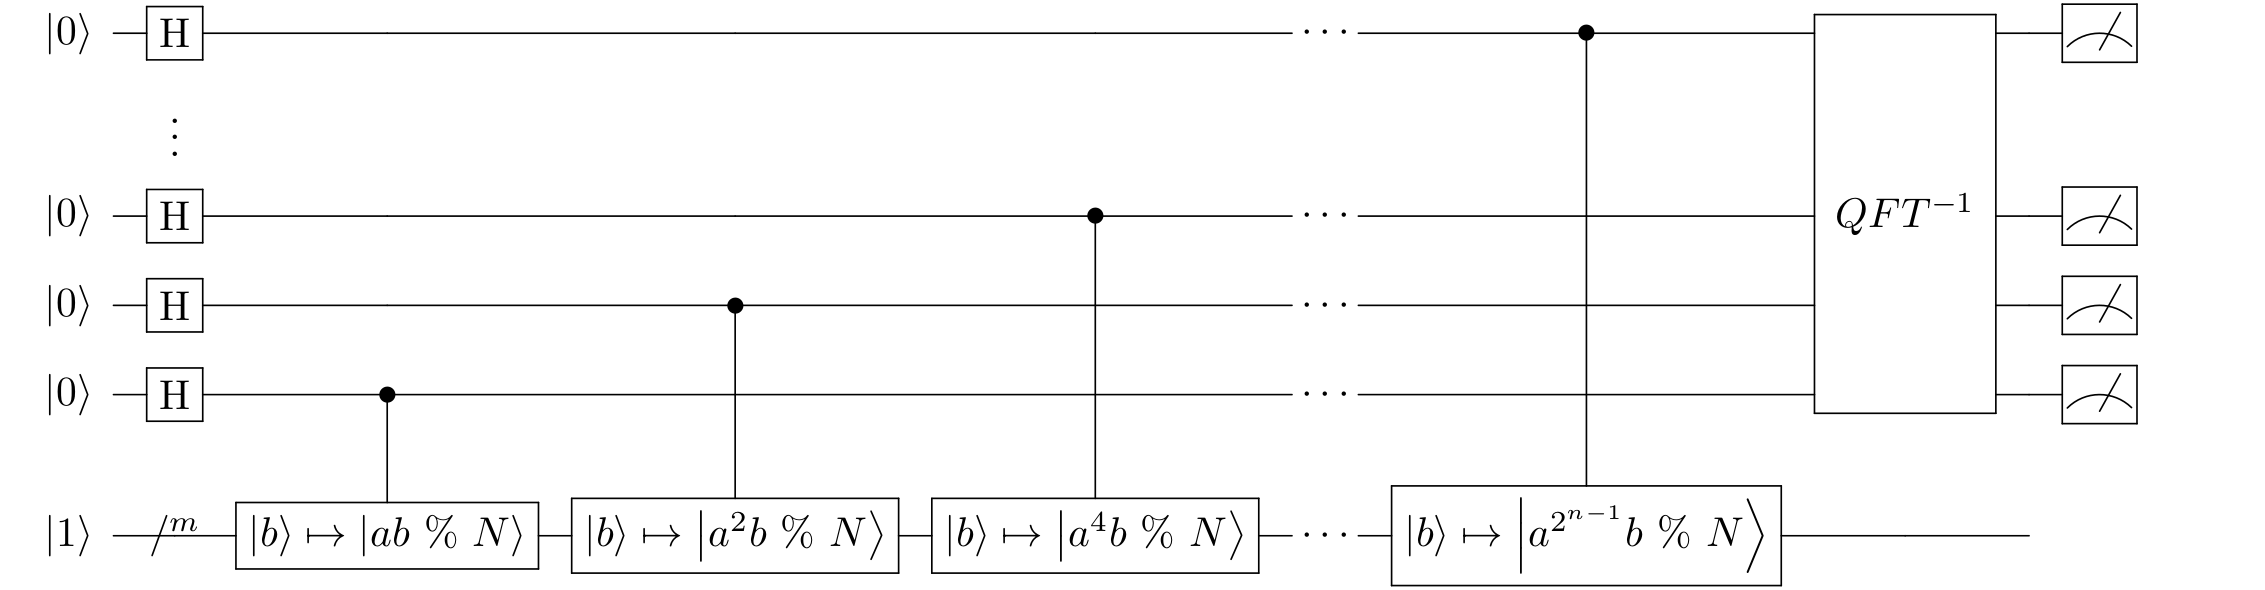

In [11]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \qw                     & \qw                     & \qw                     & \cdots & & \ctrl{6}                     & \multigate{4}{QFT^{-1}}&\qw & \meter & \nghost{\ket{0}}\\
               &                  & \push{\vdots}            &                         &                         &                         &                         &        & &                              & &    &                  & \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \qw                     & \ctrl{4}                & \qw                     & \cdots & & \qw                          & \ghost{QFT^{-1}} &\qw & \meter & \nghost{\ket{0}} \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \ctrl{3}                & \qw                     & \qw                     & \cdots & & \qw                          & \ghost{QFT^{-1}} &\qw & \meter & \nghost{\ket{0}} \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{2}                & \qw                     & \qw                     & \qw                     & \cdots & & \qw                          & \ghost{QFT^{-1}} &\qw & \meter & \nghost{\ket{0}} \\
               &                  &                   &                         &                         &                         &                         &        & &                              &  &    &                  & \\
    \nghost{1} & \lstick{\ket{1}} & {/}^m \qw         & \gate{\left|b\right\rangle \mapsto \left|ab\ \%\ N\right\rangle } & \gate{\left|b\right\rangle \mapsto \left|a^2b\ \%\ N\right\rangle } & \gate{\left|b\right\rangle \mapsto \left|a^4b\ \%\ N\right\rangle } &\qw                     & \cdots & & \gate{\left|b\right\rangle \mapsto \left|a^{2^{n-1}}b\ \%\ N\right\rangle } & \qw & \qw &  &  \\ 
}
}

\end{document}"""
draw(latex)

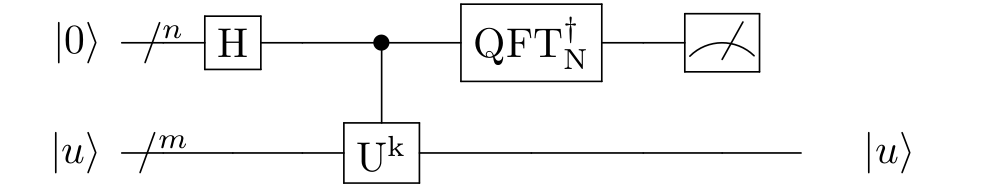

In [12]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} &{/}^n\qw & \gate{\mathrm{H}} & \qw  & \ctrl{1} & \gate{\mathrm{QFT_N^\dagger}} & \qw &\meter \\
    \nghost{1} & \lstick{\ket{u}} &{/}^m\qw & \qw               &\qw & \gate{\mathrm{U^k}} & \qw & \qw & \qw & \qw &\rstick{\ket{u}} & \nghost{\ket{u}}
}
}


\end{document}"""

draw(latex)

# State Tomography

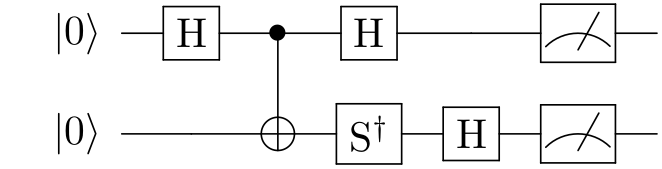

In [112]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \gate{\mathrm{H}} & \qw & \meter&\rstick{\ket{0}} \qw \\
    \nghost{1} & \lstick{\ket{0}} & \qw               &\targ & \gate{\mathrm{S^\dagger}} &\gate{\mathrm{H}}&\meter&\rstick{\ket{1}} \qw
}
}


\end{document}"""


draw(latex)

# Sandbox

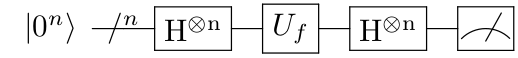

In [13]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.5}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0^n}} & {/}^n \qw & \gate{\mathrm{H^{\otimes n}}}  &  \gate{U_f} & \gate{\mathrm{H^{\otimes n}}} & \meter \\
}
}


\end{document}"""

draw(latex)

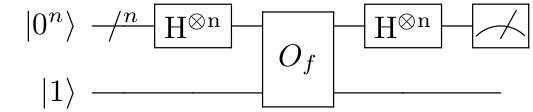

In [14]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.5}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0^n}} & {/}^n \qw & \gate{\mathrm{H^{\otimes n}}}  &  \multigate{1}{O_f} & \gate{\mathrm{H^{\otimes n}}} & \meter \\
    \nghost{1} & \lstick{\ket{1}} &  \qw & \qw  &  \ghost{O_f} & \qw & \qw \\
}
}


\end{document}"""

draw(latex)

In [15]:
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));
circuit.draw(output="latex_source")

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'the latex and latex_source circuit drawers'. You can install it with 'pip install pylatexenc'."

In [ ]:
s = '\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'
draw(s)

In [ ]:
latex = r"""\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}"""

draw(latex)

In [ ]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \nghost{1} & \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

In [ ]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

In [ ]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{

\Qcircuit @C=1.3em @R=.6em {
& & & & & & \mbox{Syndrome Measurement} & & & &
\mbox{Recovery}\\
& \qw & \qw & \ctrl{3} & \qw & \qw & \qw &
\ctrl{5} & \qw & \qw &
\multigate{2}{\ \mathcal{R}\ } & \qw\\
& \qw & \qw & \qw & \ctrl{2} & \ctrl{3} & \qw &
\qw & \qw & \qw & \ghost{\ \mathcal{R}\ } \qw &
\qw\\
& \qw & \qw & \qw & \qw & \qw & \ctrl{2} & \qw &
\ctrl{3} & \qw & \ghost{\ \mathcal{R}\ } \qw &
\qw\\
& & \lstick{\ket{0}} & \targ \qw & \targ \qw &
\qw & \qw & \qw & \qw & \measure{M_a} &
\control \cw \cwx\\
& & \lstick{\ket{0}} & \qw & \qw & \targ \qw &
\targ \qw & \qw & \qw & \measure{M_b} &
\control \cw \cwx\\
& & \lstick{\ket{0}} & \qw & \qw & \qw & \qw &
\targ \qw & \targ \qw & \measure{M_c}
\gategroup{2}{2}{7}{10}{.8em}{--} &
\control \cw \cwx
}

}


\end{document}"""

draw(latex)

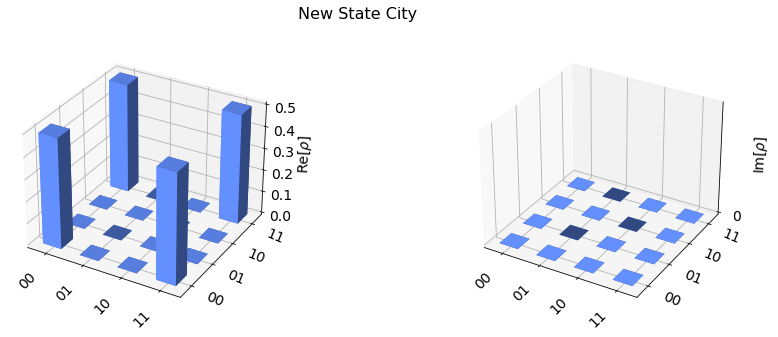

In [17]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = DensityMatrix(qc)
plot_state_city(state, title="New State City")

In [38]:
import numpy as np
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
# print((A @ B).trace())

# A.reshape(1,4) @ B.reshape(4,1, order='F')

print(A.reshape(1,4, order='F'))

[[1 3 2 4]]


In [35]:
M = np.array([[ 0.5+0.j ,  0.5+0.j ,  0.5+0.j ,  0.5+0.j ],
       [ 0.5+0.j , -0.5+0.j , -0.5+0.j ,  0.5+0.j ],
       [ 0.5+0.j ,  0. -0.5j,  0. +0.5j,  0.5+0.j ],
       [ 0.5+0.j ,  0. +0.5j,  0. -0.5j,  0.5+0.j ],
       [ 1. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ],
       [ 0. +0.j ,  0. +0.j ,  0. +0.j ,  1. +0.j ]])

rho = np.array([[0.5, 0.5], [0.5, 0.5]])
M @ rho.reshape(4,1)

array([[1. +0.j],
       [0. +0.j],
       [0.5+0.j],
       [0.5+0.j],
       [0.5+0.j],
       [0.5+0.j]])

In [42]:
PY0 = 0.5*np.array([[1, -1j], [1j, 1]])
PY1 = 0.5*np.array([[1, 1j], [-1j, 1]])
print(PY0.reshape(1,4, order='F').conjugate())
print(PY1.reshape(1,4, order='F').conjugate())

[[0.5-0.j  0. -0.5j 0. +0.5j 0.5-0.j ]]
[[0.5-0.j  0. +0.5j 0. -0.5j 0.5-0.j ]]


In [45]:
print((PY0 @ B).trace())
print(PY0.reshape(1,4, order='F').conjugate() @ B.reshape(1,4, order='F').T)

(6.5-0.5j)
[[6.5-0.5j]]


In [46]:
print((PY1 @ B).trace())
print(PY1.reshape(1,4, order='F').conjugate() @ B.reshape(1,4, order='F').T)

(6.5+0.5j)
[[6.5+0.5j]]


In [54]:
print((PY0 @ B).trace())
print(PY0.reshape(1,4, order='F') @ B.reshape(1,4, order='F').T)
# print(PY0.reshape(1,4, order='F'))
# print(B.reshape(1,4, order='F').T)

(6.5-0.5j)
[[6.5+0.5j]]


In [53]:
print(PY0 @ PY0)
print(PY0)

[[0.5+0.j  0. -0.5j]
 [0. +0.5j 0.5+0.j ]]
[[0.5+0.j  0. -0.5j]
 [0. +0.5j 0.5+0.j ]]


In [106]:
import numpy as np
import itertools
import qiskit 
from qiskit import QuantumRegister, QuantumCircuit
from qiskit import Aer
import qiskit.ignis.verification.tomography as tomo
from qiskit.quantum_info import state_fidelity

# q2 = QuantumRegister(2)
# bell = QuantumCircuit(q2)
# bell.h(q2[0])
# bell.cx(q2[0], q2[1])
# bell.qasm()

# q1 = QuantumRegister(1)
# bell = QuantumCircuit(q1)
# bell.h(q1[0])
# bell.qasm()

q2 = QuantumRegister(2)
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])
bell.qasm()
qst_bell = tomo.state_tomography_circuits(bell, q2)
#qst_bell = tomo.state_tomography_circuits(bell, q1)
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

In [105]:
for qc in qst_bell:
    print(qc)

        ┌───┐      ░ ┌───┐┌─┐   
q191_0: ┤ H ├──■───░─┤ H ├┤M├───
        └───┘┌─┴─┐ ░ ├───┤└╥┘┌─┐
q191_1: ─────┤ X ├─░─┤ H ├─╫─┤M├
             └───┘ ░ └───┘ ║ └╥┘
  c4: 2/═══════════════════╩══╩═
                           0  1 
        ┌───┐      ░  ┌───┐ ┌─┐        
q191_0: ┤ H ├──■───░──┤ H ├─┤M├────────
        └───┘┌─┴─┐ ░ ┌┴───┴┐└╥┘┌───┐┌─┐
q191_1: ─────┤ X ├─░─┤ Sdg ├─╫─┤ H ├┤M├
             └───┘ ░ └─────┘ ║ └───┘└╥┘
  c4: 2/═════════════════════╩═══════╩═
                             0       1 
        ┌───┐      ░ ┌───┐┌─┐
q191_0: ┤ H ├──■───░─┤ H ├┤M├
        └───┘┌─┴─┐ ░ └┬─┬┘└╥┘
q191_1: ─────┤ X ├─░──┤M├──╫─
             └───┘ ░  └╥┘  ║ 
  c4: 2/═══════════════╩═══╩═
                       1   0 
        ┌───┐      ░ ┌─────┐┌───┐┌─┐
q191_0: ┤ H ├──■───░─┤ Sdg ├┤ H ├┤M├
        └───┘┌─┴─┐ ░ └┬───┬┘└┬─┬┘└╥┘
q191_1: ─────┤ X ├─░──┤ H ├──┤M├──╫─
             └───┘ ░  └───┘  └╥┘  ║ 
  c4: 2/══════════════════════╩═══╩═
                              1   0 
        ┌───┐      ░

In [100]:
statefit = tomo.StateTomographyFitter(job.result(), qst_bell)
statefit.data

{('X', 'X'): {'11': 2480, '00': 2520},
 ('X', 'Y'): {'00': 1287, '10': 1233, '11': 1192, '01': 1288},
 ('X', 'Z'): {'10': 1206, '00': 1226, '01': 1265, '11': 1303},
 ('Y', 'X'): {'11': 1265, '10': 1240, '01': 1225, '00': 1270},
 ('Y', 'Y'): {'01': 2515, '10': 2485},
 ('Y', 'Z'): {'01': 1267, '00': 1269, '11': 1220, '10': 1244},
 ('Z', 'X'): {'11': 1244, '01': 1279, '10': 1255, '00': 1222},
 ('Z', 'Y'): {'00': 1239, '11': 1257, '10': 1249, '01': 1255},
 ('Z', 'Z'): {'00': 2478, '11': 2522}}

In [101]:
p, M, weights = statefit._fitter_data(True, 0.5)
M

array([[ 0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
         0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
         0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
         0.25-0.j  ],
       [ 0.25-0.j  , -0.25-0.j  ,  0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,
         0.25-0.j  , -0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  , -0.25-0.j  ,
         0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,  0.25-0.j  , -0.25-0.j  ,
         0.25-0.j  ],
       [ 0.25-0.j  ,  0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,  0.25-0.j  ,
         0.25-0.j  , -0.25-0.j  , -0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,
         0.25-0.j  ,  0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,  0.25-0.j  ,
         0.25-0.j  ],
       [ 0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,  0.25-0.j  , -0.25-0.j  ,
         0.25-0.j  ,  0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,  0.25-0.j  ,
         0.25-0.j  , -0.25-0.j  ,  0.25-0.j  , -0.25-0.j  , -0.25-0.j  ,
         0.25-0.j  ],
       [ 0.25-0.j  ,  0.25-0.j  ,  0

In [103]:
len(p)

36

In [68]:
A = np.array([[0.999, 3], [0.5, 1.5]])

norm_A = 4.5

In [72]:
d = 0.999*1.5 - 3*0.5
d

-0.0015000000000000568

In [75]:
A_inv = np.array([[1.5, -3], [-0.5, 0.999]]) / d
A_inv

array([[-1000.        ,  2000.        ],
       [  333.33333333,  -666.        ]])

In [69]:
np.linalg.inv(A)

array([[-1000.        ,  2000.        ],
       [  333.33333333,  -666.        ]])

In [84]:
M = np.array([
    [0.5, 0.5, 0.5, 0.5],
    [0.5, -0.5, -0.5, 0.5],
    [0.5, 0.5j, -0.5j, 0.5],
    [0.5, -0.5j, 0.5j, 0.5],
    [1,0,0,0],
    [0,0,0,1]
])
A = np.linalg.inv(M.conjugate().T @ M) @ M.conjugate().T

In [92]:
p = np.array([[1],[0],[0.5],[0.5],[0.5],[0.5]])
A @ p

array([[0.5+0.j],
       [0.5+0.j],
       [0.5+0.j],
       [0.5+0.j]])

In [91]:
PY0 = np.array([[0.5, -0.5j], [0.5j, 0.5]])
s = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
s.T @ PY0 @ s

array([[0.5+0.j]])

In [96]:
Z = np.array([[1,0],[0,-1]])
H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
S_dag = np.array([[1,0],[0,-1j]])
A = H @ S_dag
A.conjugate().T @ Z @ A

array([[-2.23711432e-17+0.j,  0.00000000e+00-1.j],
       [ 0.00000000e+00+1.j, -2.23711432e-17+0.j]])